Atividade (1.5): Classificando um conjunto de imagens de animais (gato, cachorro e panda)
1. Aquisição das imagens através do dataset: https://www.kaggle.com/ashishsaxena2209/animal-image-datasetdog-cat-and-panda
2. Pré-processamento: Redimensione a imagem do dataset para 64 × 64 pixels, e certifique-se de que tenham os três canais (RGB). As imagens nas quais o modelo deve ser treinado devem ser pré-processadas para que seus valores variem de [0,1], portanto, você deve garantir que suas imagens também estejam no mesmo intervalo. As labels devem ser criadas e transformadas em dados categóricos e não esqueçam de embaralhar as amostras de modo que a label também seja embaralhada na mesma sequência. Dica: função load_img do keras.preprocessing.image e utilizar 80% das amostras para treino e 20% para teste;
3. Adaptar a arquitetura apresentada no tutorial para o novo dataset.

In [28]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras import utils
import numpy as np

import os
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

## 2. Aquisição dos dados

In [29]:
path = "C:/Users/Bryan/Documents/2022.2/Sistemas Inteligentes/Sistema-Inteligente/atividade09/archive"
DATASET_PATH = os.path.join( path, 'animals')

categories = ['dogs', 'panda', 'cats']

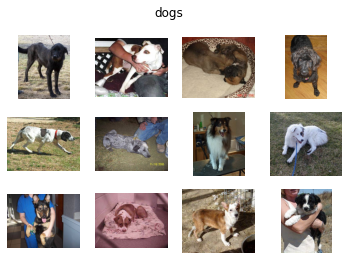

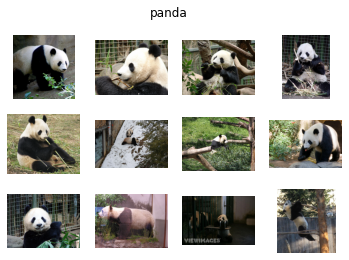

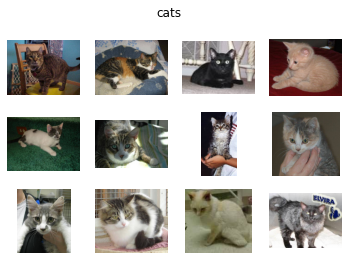

In [30]:
for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    fig.patch.set_facecolor('xkcd:white')
    path_category = os.path.join(DATASET_PATH, category)
    for k, v in enumerate(os.listdir(path_category)[:12]):
        img = plt.imread(os.path.join(path_category, v))
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

### 3. Pré-processamento

In [31]:
imagePaths = []
for k, category in enumerate(categories):
    path_category = os.path.join(DATASET_PATH, category)
    for f in os.listdir(path_category):
        imagePaths.append([os.path.join(path_category, f), k]) # k=0 : 'dog', k=1 : 'panda', k=2 : 'cat'

In [32]:
print(imagePaths[1][1])

0


In [36]:
dataset = []
labels = []
for imagePath in imagePaths:
    image = np.array(load_img(imagePath[0], target_size=(64, 64)), dtype='float')
    dataset.append(image)


    label = imagePath[1]
    labels.append(label)

dataset[30]

array([[[159., 163., 140.],
        [159., 163., 140.],
        [159., 162., 141.],
        ...,
        [162., 164., 153.],
        [162., 164., 153.],
        [162., 164., 153.]],

       [[159., 162., 145.],
        [159., 162., 145.],
        [160., 163., 144.],
        ...,
        [154., 156., 145.],
        [154., 156., 145.],
        [154., 156., 145.]],

       [[159., 160., 154.],
        [158., 160., 147.],
        [155., 158., 139.],
        ...,
        [168., 170., 159.],
        [175., 177., 166.],
        [177., 179., 168.]],

       ...,

       [[ 97.,  98.,  84.],
        [124., 127., 118.],
        [160., 155., 123.],
        ...,
        [239., 201.,  92.],
        [244., 207.,  93.],
        [230., 192.,  95.]],

       [[ 38.,  37.,  45.],
        [ 36.,  39.,  54.],
        [ 75.,  72.,  67.],
        ...,
        [229., 191.,  82.],
        [222., 184.,  75.],
        [213., 178.,  86.]],

       [[ 36.,  38.,  53.],
        [ 44.,  43.,  57.],
        [ 50.,  

In [35]:
print(len(dataset))
print(len(labels))
print(dataset[0].shape)

3000
3000
(64, 64, 3)


In [57]:
X_train = dataset[:800] + dataset[1000:1800] + dataset[2000:2800]
y_train = labels[:800] + labels[1000:1800] + labels[2000:2800]
X_test = dataset[800:1000] + dataset[1800:2000] + dataset[2800:]
y_test = labels[800:1000] + labels[1800:2000] + labels[2800:]

print(len(X_train))
print(len(X_test))
type(X_train)

2400
600


list

In [45]:
X_train = np.array(dataset, dtype="float") / 255.0
X_test = np.array(X_test, dtype="float") / 255.0
# print(X_train)
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [46]:
index = np.random.permutation(2400)
X_train, y_train = X_train[index], y_train[index]

In [47]:
index = np.random.permutation(600)
X_test, y_test = X_test[index], y_test[index]

### 4. Arquitetura da CNN

In [58]:
# Inicializando a CNN
classifier = Sequential()

#Camada de convolução
classifier.add(Convolution2D(32, kernel_size=(3,3), input_shape = (64, 64, 1), activation = 'relu', padding='same', name = 'conv_1'))

#Camada de pooling
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2), padding='same', name = 'pool_1'))

#Segunda camada convolucional
classifier.add(Convolution2D(64, kernel_size=(3,3), activation = 'relu', padding='same', name = 'conv_2'))

#Dropout
classifier.add(Dropout(0.25))

#Segunda camada de pooling
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same', name = 'pool_2'))


#Vetorizando os mapas de características do último pooling (camada de entrada)
classifier.add(Flatten())

#Dropout
classifier.add(Dropout(0.5))

#Camada totalmente conectada ou oculta
classifier.add(Dense(activation='relu', units=128, name = 'dense_1'))


#Camada de saída
classifier.add(Dense(activation='softmax', units=10,  name = 'classification'))